# Imports

In [5]:
# Import ratinabox
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import *
import matplotlib.pyplot as plt
from ratinabox import utils

# Import plotting functions
from tqdm.notebook import tqdm  # gives time bar
import numpy as np

# Import custom neurons and utilities
from myNeurons import *
from myUtilities import *

# get the current directory
import os
cwd = os.getcwd()

#stylize plots and set figure directory for saving 
ratinabox.stylize_plots(); 
ratinabox.autosave_plots=True
ratinabox.figure_directory= cwd + "/ratty_plots/"

# Environment

Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/lecture6/ratty_plots/16_02_24/Environment_1939.png  & .svg


(<Figure size 600x600 with 1 Axes>, <Axes: >)

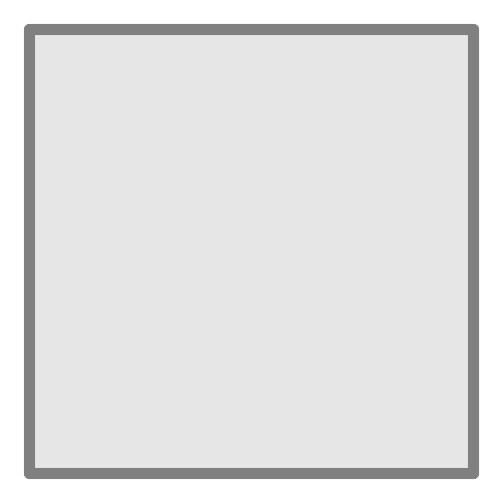

In [6]:
# Build the environment (square, 1m by 1m)
Env = Environment(params={"aspect": 1, "scale": 1})
Env.plot_environment()

# Agent

In [7]:
Ag = Agent(Env, params = {"dt": 0.001, "include_stabilization_period": True, "timestep": 0})     # Initialize an agent                                                      

/Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/lecture6/.venv/lib/python3.12/site-packages/ratinabox/utils.py:878: UserWarning: Found 2 unexpected params key(s) while initializing Agent object: 'include_stabilization_period', 'timestep'.
If you intended to set this parameter, ignore this message. To see all default parameters for this class call Agent.get_all_default_params().
  warnings.warn(


# Neurons

## initialize

In [8]:
# Initialize custom made cells ---------------------------------------------------------------------
AVCs = AngularVelocityCells(Ag)         # angular velocity cells

n_cells = 75
HRCs_CCW = HeadRotationCells(Ag, params={"name": "CounterClockwiseHeadRotationCells", "n":n_cells})        # Head rotation (AVHD) cells - counterclockwise rotation
HRCs_CW = HeadRotationCells(Ag, params={"name": "ClockwiseHeadRotationCells", "n":n_cells})         # Head rotation (AVHD) cells - clockwise rotation

HDCs = BespokeHeadDirectionCells(Ag, params={"n":n_cells})      # The OJ

ICs = InhibitoryCells(Ag, params={"n":n_cells})                 # Inhibitory cells

VCs = VisualCells(Ag, params={"n":n_cells})                     # Visual Cells

GCs = GainCells(Ag, params={"n":n_cells})

neurons_in_environment = [AVCs, VCs, HDCs, HRCs_CCW,HRCs_CW,  ICs,  GCs]


## wire

In [9]:
# Input to Head Rotation (AVHD) cells
HRCs_CCW.add_input(HDCs, w = HDCs.build_HDC_to_HR_weight_matrix(weight_value=0.3))                          # Head direction
HRCs_CW.add_input (HDCs, w = HDCs.build_HDC_to_HR_weight_matrix(weight_value=0.3))
HRCs_CCW.add_input(AVCs, w = AVCs.build_AV_to_HR_weight_matrix(CW=False, weight_value=1, HR = HRCs_CCW))   # Angular Velocity
HRCs_CW.add_input (AVCs, w = AVCs.build_AV_to_HR_weight_matrix(CW=True,weight_value=1, HR = HRCs_CW))

# # Input to Head Direction Cells
HDCs.add_input(HRCs_CCW, w = HRCs_CCW.build_HR_to_HDC_weight_matrix(CW = False, weight_value=1.6248, offset=5, sigma=5))    # CCW Head Rotation
HDCs.add_input(HRCs_CW, w = HRCs_CW.build_HR_to_HDC_weight_matrix(CW = True, weight_value=1.6248, offset=5, sigma=5))    # CW Head Rotation
HDCs.add_input(ICs, w = ICs.build_I_to_HDC_weight_matrix(sigma=15, weight_value = 0.0432))    # Inhibitory
#HDCs.add_input(VCs,  w = VCs.build_V_to_HDC_weight_matrix(weight_value=.32)) # ****
HDCs.add_input(VCs,  w = VCs.build_V_to_HDC_weight_matrix(weight_value=32)) # ****
HDCs.add_input(GCs,  w = GCs.build_G_to_HDC_weight_matrix(HDCs= HDCs, weight_value=4.8))

# # Input to Inhibitory Cells
ICs.add_input(HDCs, w = HDCs.build_HDC_to_I_weight_matrix(weight_value=3))        # HDCs input to ICs

# Run

## Initialize

In [10]:
a_in = .8
timesteps_baseline = 300
initialize_agent(Ag, neurons_in_environment, alpha = a_in, timesteps=timesteps_baseline, verbose = False)

Be certain all of your neurons are in the neurons list & in the proper order!!!


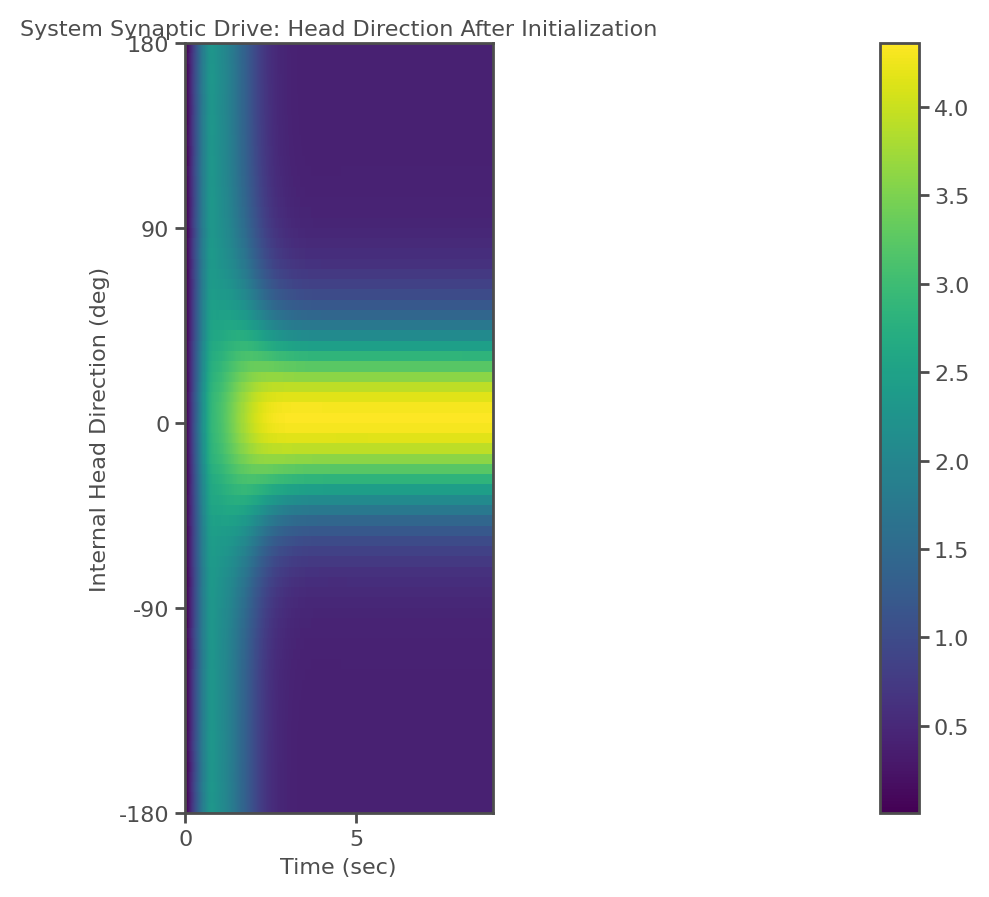

In [11]:
plot_synaptic_drive(np.array(HDCs.history['firingrate']), dt = 30, t_adder = "Head Direction After Initialization", vmin = None, vmax = None)

## Cue shift with immobile animal

Be certain all of your neurons are in the neurons list & in the proper order!!!


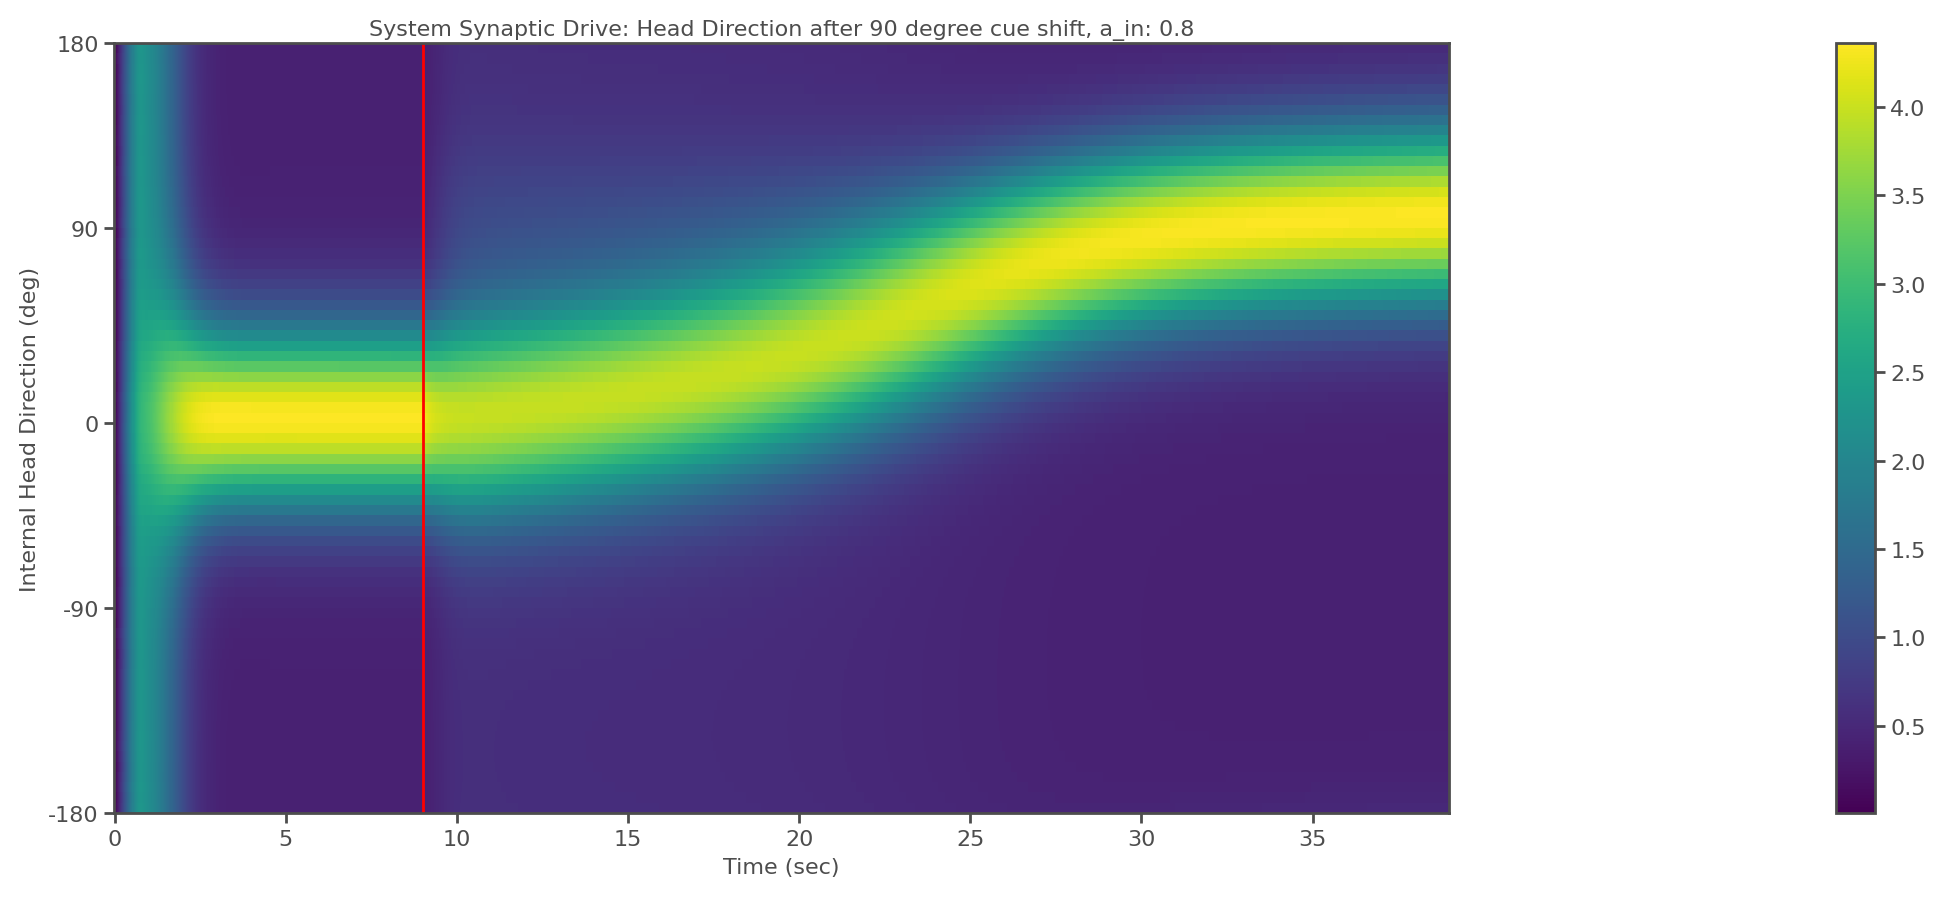

In [12]:
run_agent(Ag, neurons_in_environment, alpha = a_in, timesteps = 1000, cue_location = 20, lights_on = True)
plot_synaptic_drive(np.array(HDCs.history['firingrate']), dt = 30, t_adder = f"Head Direction after 90 degree cue shift, a_in: {a_in}", vmin = None, vmax = None, vertical_line=[timesteps_baseline])